# Single variable 

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored
%config IPCompleter.greedy=True

In [253]:
data = np.loadtxt('ex1data1.txt', delimiter=",")

In [254]:
data[0]

array([  6.1101,  17.592 ])

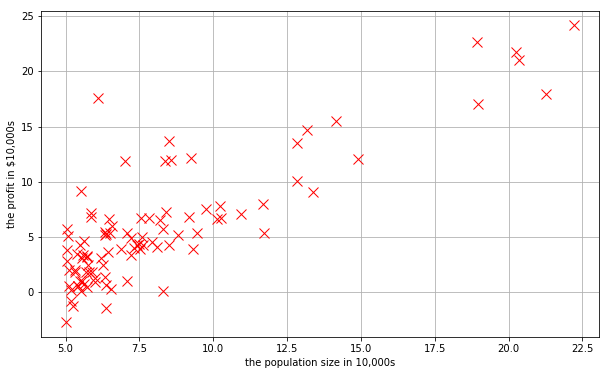

In [255]:
plt.figure(figsize=(10,6))
plt.plot(data[:,0],data[:,1], 'rx', markersize=10)
plt.grid(True)
plt.xlabel('the population size in 10,000s')
plt.ylabel('the profit in $10,000s')
plt.show()

In [256]:
m = data.shape[0]
theta = np.zeros(2)
X = np.vstack(zip(np.ones(m),data[:,0]))
#X = np.column_stack((np.ones(m), data[:,0]))
y = data[:, 1]
print(X[:5])

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]


#### y = theta_0 + theta_1 * x 

In [257]:
def computeCost(theta, X, y):
    return np.sum(pow(X.dot(theta) - y, 2)) / (2.0*len(y))
computeCost(theta, X, y)

32.072733877455676

In [258]:
def h(X, theta):
    return X.dot(theta)
print(h(X,theta))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [259]:
def descentGradient(X, y, theta=np.zeros(2)):
    iteration = 2000
    learning_rate = 0.01
    j_history = []
    for i in range(iteration):
        hypothesis = h(X, theta)
        for j in range(len(theta)):
            diff = np.sum((hypothesis-y) * X[:,j])
            theta[j] -= diff / m * learning_rate
        
        j_history.append(computeCost(theta, X, y))
    
    return theta, j_history

theta, j_history = descentGradient(X, y)

In [260]:
def plotJHistory(j):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(j)), j, "go")
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("iteration")
    plt.ylabel("cost function")
    plt.show()

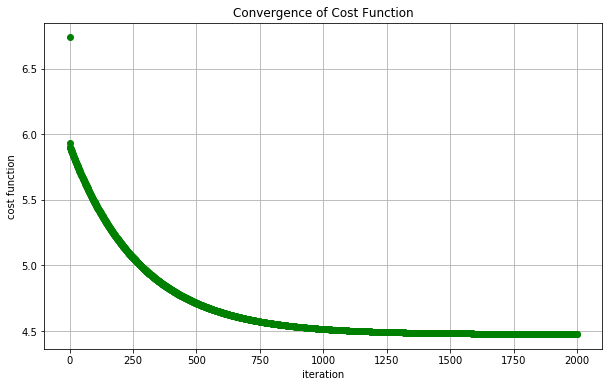

In [261]:
plotJHistory(j_history)

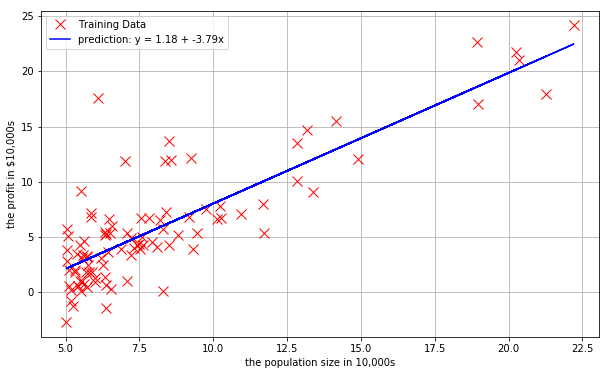

In [263]:
def plotPredict(X, y, theta, predict):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('the population size in 10,000s')
    plt.ylabel('the profit in $10,000s')
    plt.plot(X[:,1], y, "rx", markersize=10, label="Training Data")
    plt.plot(X[:,1], predict, "b-", label = "prediction: y = %.2f + %.2fx" % (theta[1], theta[0]))
    plt.legend()
    plt.show()

plotPredict(X, y, theta, h(X, theta))

# multi variable 

In [233]:
data = np.loadtxt('ex1data2.txt', delimiter=",")

In [234]:
print(data[:5])

[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]]


In [235]:
X = data[:,:2]
y = data[:,2]

In [236]:
def plotData(X):
    plt.figure(figsize=(10,6))
    plt.xlabel("columus")
    plt.ylabel("value")
    plt.hist(X[:,0], label="col1")
    plt.hist(X[:,1], label="col2")
    plt.legend()
    plt.show()

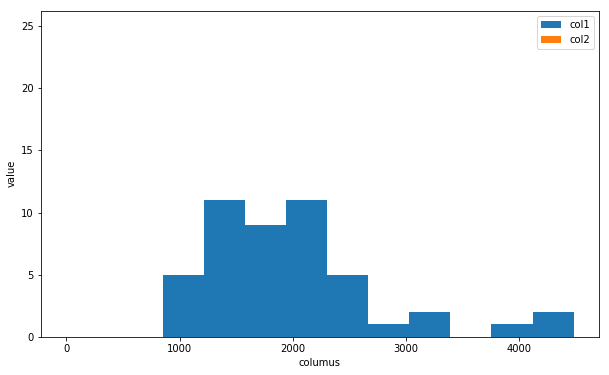

In [237]:
plotData(X)

In [238]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.mean(X, axis=0)
    X = (X - mean)/std
    return X, mean, std
print(X[:5])
X_, mean, std = normalize(X)
print(X_[:5])

[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]]
[[ 0.05164199 -0.05369128]
 [-0.20027225 -0.05369128]
 [ 0.19959163 -0.05369128]
 [-0.29224094 -0.36912752]
 [ 0.49948954  0.26174497]]


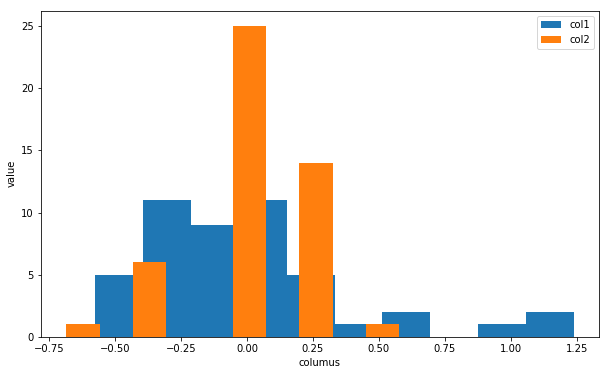

In [239]:
plotData(X_)

In [240]:
X_ = np.concatenate((np.ones((len(X_), 1)), X_), axis=1)

In [241]:
print(X_[:5])

[[ 1.          0.05164199 -0.05369128]
 [ 1.         -0.20027225 -0.05369128]
 [ 1.          0.19959163 -0.05369128]
 [ 1.         -0.29224094 -0.36912752]
 [ 1.          0.49948954  0.26174497]]


In [242]:
initial_theta = np.zeros(3)

### now data is prepared 

In [243]:
print(colored("X", "blue"), X_[:5], 
      colored("\ny", "blue"), y[:5], 
      colored("\ntheta", "blue"), initial_theta)

X [[ 1.          0.05164199 -0.05369128]
 [ 1.         -0.20027225 -0.05369128]
 [ 1.          0.19959163 -0.05369128]
 [ 1.         -0.29224094 -0.36912752]
 [ 1.          0.49948954  0.26174497]] 
y [ 399900.  329900.  369000.  232000.  539900.] 
theta [ 0.  0.  0.]


In [244]:
computeCost(initial_theta, X_, y)

65591548106.457443

In [245]:
#descentGradient(X, y, theta=np.zeros(2)):
theta, history = descentGradient(X_, y, initial_theta)

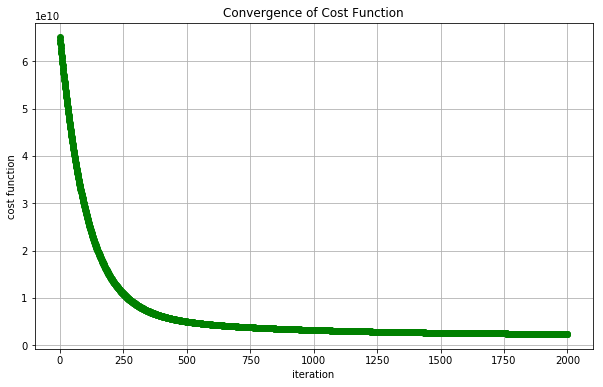

In [246]:
plotJHistory(history)

In [247]:
ytest = np.array([1650., 3.])
ytest = (ytest - mean)/std

In [248]:
ytest = np.insert(ytest, 0, 1)

In [249]:
print("$%0.2f" % h(ytest, theta))

$303067.85


In [250]:
def normEquation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T),y)

In [251]:
print("$%0.2f" % h(ytest, normEquation(X_,y)))

$293081.46
